In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
house = pd.read_csv('Housing.csv')

In [25]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [26]:
house.shape

(545, 13)

In [27]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


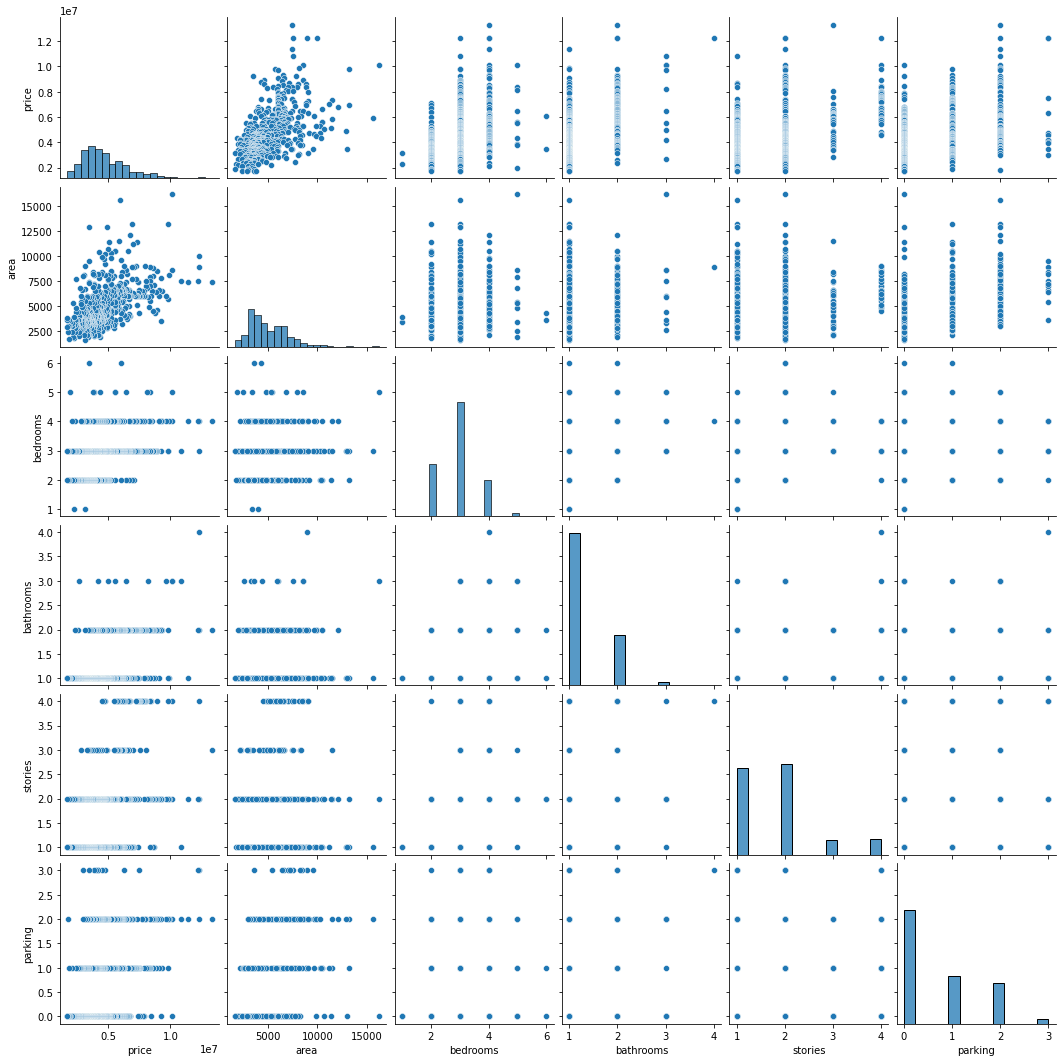

In [28]:
sns.pairplot(data=house)

In [29]:
house.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
house = pd.get_dummies(data=house, columns= ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'] , drop_first= True)
house.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


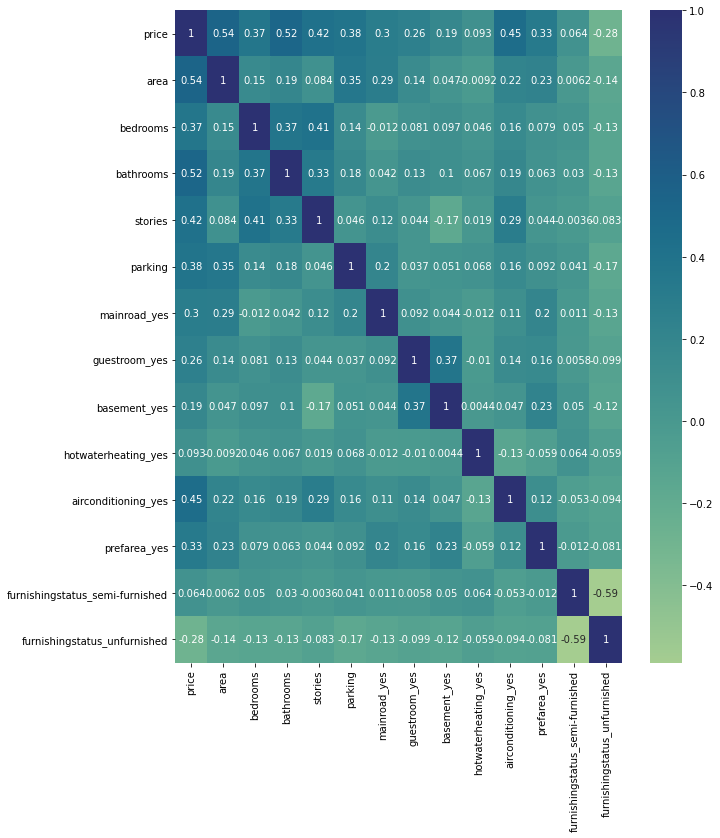

In [31]:
plt.figure(figsize=(10,12))
sns.heatmap(data=house.corr(), annot=True, cmap='crest' )
plt.show()


In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [33]:
from scipy.sparse import data
df_train, df_test = train_test_split( house, train_size = 0.7, random_state =100)

In [34]:
df_train.shape 


(381, 14)

In [35]:

df_test.shape

(164, 14)

In [36]:
df_train.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [37]:
scaler = MinMaxScaler()
df_train[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']] = scaler.fit_transform(df_train[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']])
df_train.head()



<ipython-input-37-b8f58ae484e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,0.615152,0.403379,0.4,0.5,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
159,0.321212,0.115628,0.4,0.5,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
35,0.548133,0.454417,0.4,0.5,1.000000,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28,0.575758,0.538015,0.8,0.5,0.333333,0.666667,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [38]:
df_train

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,0.615152,0.403379,0.4,0.5,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
159,0.321212,0.115628,0.4,0.5,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
35,0.548133,0.454417,0.4,0.5,1.000000,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28,0.575758,0.538015,0.8,0.5,0.333333,0.666667,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.048485,0.118268,0.2,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53,0.484848,0.291623,0.4,0.5,1.000000,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
350,0.175758,0.139388,0.2,0.0,0.333333,0.333333,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
79,0.424242,0.366420,0.4,0.5,0.666667,0.000000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


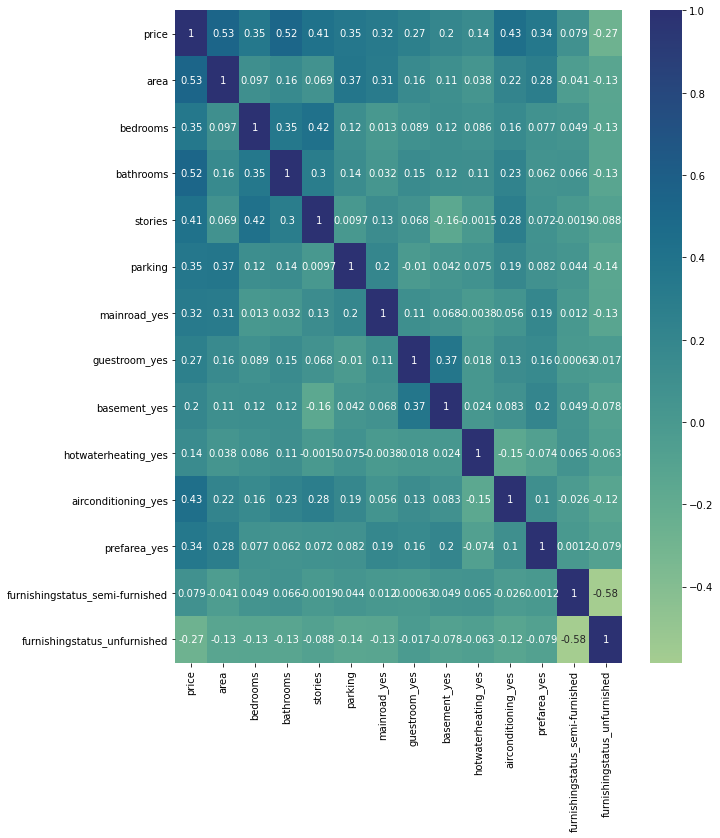

In [39]:
plt.figure(figsize=(10,12))
sns.heatmap(data=df_train.corr(), annot=True, cmap='crest' )
plt.show()


In [40]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,0.615152,0.403379,0.4,0.5,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
159,0.321212,0.115628,0.4,0.5,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
35,0.548133,0.454417,0.4,0.5,1.000000,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28,0.575758,0.538015,0.8,0.5,0.333333,0.666667,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [41]:
X_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
X_train.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
359,0.155227,0.4,0.0,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,0.403379,0.4,0.5,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
159,0.115628,0.4,0.5,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
35,0.454417,0.4,0.5,1.000000,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28,0.538015,0.8,0.5,0.333333,0.666667,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [42]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,0.615152,0.403379,0.4,0.5,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
159,0.321212,0.115628,0.4,0.5,0.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
35,0.548133,0.454417,0.4,0.5,1.000000,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
28,0.575758,0.538015,0.8,0.5,0.333333,0.666667,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [43]:
y_train = df_train.pop('price')
X_train = df_train

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rfe = RFE( lr_model, step = 10 )

rfe = rfe.fit(X_train, y_train)

rfe_result = pd.DataFrame(zip(X_train.columns,rfe.support_,rfe.ranking_))

rfe_result.sort_values(by=2, ascending=True)

,0,1,2
0,area,True,1
2,bathrooms,True,1
3,stories,True,1
4,parking,True,1
8,hotwaterheating_yes,True,1
9,airconditioning_yes,True,1
1,bedrooms,False,2
5,mainroad_yes,False,2
6,guestroom_yes,False,2
7,basement_yes,False,2


In [46]:
col = X_train.columns[rfe.support_]

In [47]:
X_train_rfe = X_train[col]

In [48]:
import statsmodels.api as sm 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     96.72
Date:                Wed, 10 May 2023   Prob (F-statistic):           5.54e-73
Time:                        16:14:08   Log-Likelihood:                 342.29
No. Observations:                 381   AIC:                            -670.6
Df Residuals:                     374   BIC:                            -643.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0635      0.011      6.008      0.000       0.043       0.084
area                    0.3210      0.031     10.436      0.000       0.260       0.381
bathrooms               0.2110      0.023      9.080      0.000       0.165       0.257
stories                 0.1228      0.019      6.584      0.000       0.086       0.159
parking                 0.0675      0.019      3.469      0.001       0.029       0.106
hotwaterheating_yes     0.0812      0.024      3.455      0.001       0.035       0.127
airconditioning_yes     0.0726      0.012      5.915      0.000       0.048       0.097
==============================================================================
Omnibus:                       73.518   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              202.572
Skew:                           0.906   Prob(JB):                     1.03e-44
Kurtosis:                       6.079   Cond. No.                         7.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,area,2.63
3,parking,2.01
2,stories,1.87
5,airconditioning_yes,1.73
1,bathrooms,1.56
4,hotwaterheating_yes,1.11


In [50]:
y_train_pred = lm.predict(X_train_rfe)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

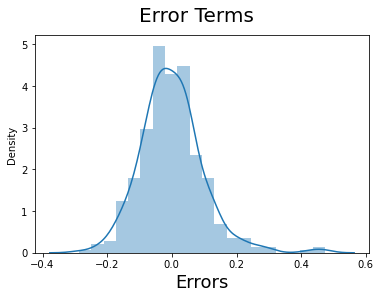

In [51]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [52]:
df_test[df_test.columns] = scaler.transform(df_test[df_test.columns])

<ipython-input-52-d306ae2f9e5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[df_test.columns] = scaler.transform(df_test[df_test.columns])
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [53]:
df_test.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
54,0.484848,0.366420,0.4,0.5,0.333333,0.333333,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
171,0.303030,0.742080,0.4,0.0,0.000000,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
244,0.242424,0.306582,0.4,0.0,0.333333,0.000000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
268,0.227879,0.274023,0.6,0.0,0.333333,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [54]:
y_test = df_test.pop('price')
X_test = df_test

In [55]:
X_test_rfe = X_test[col]
X_test_rfe.head()

,area,bathrooms,stories,parking,hotwaterheating_yes,airconditioning_yes
265,0.091869,0.0,0.333333,0.000000,0.0,0.0
54,0.366420,0.5,0.333333,0.333333,0.0,1.0
171,0.742080,0.0,0.000000,0.333333,0.0,0.0
244,0.306582,0.0,0.333333,0.000000,0.0,0.0
268,0.274023,0.0,0.333333,0.000000,0.0,1.0


In [56]:
X_test_rfe = sm.add_constant(X_test_rfe)

In [57]:
y_test_pred =lm.predict(X_test_rfe)

Text(0, 0.5, 'y_test_pred')

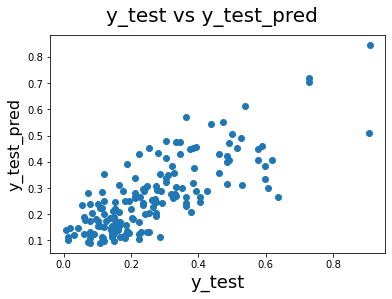

In [58]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16) 

In [59]:
import pickle

In [60]:
pickle.dump(lm,open('regmodel.pkl','wb'))

In [62]:
pickle.model = pickle.load(open('regmodel.pkl','rb'))

In [65]:
## Prediction
house.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0
